In [1]:
!pip install pandas_datareader


In [2]:
import pandas_datareader as pdr
key=""
ticker='JPM'

In [3]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
filename=ticker+'.csv'
df.to_csv(filename)


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv(filename)

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,JPM,2019-01-08 00:00:00+00:00,100.57,101.82,99.55,101.63,13578777,86.561604,87.637492,85.683680,87.473957,13578777,0.0,1.0
1,JPM,2019-01-09 00:00:00+00:00,100.40,101.49,99.93,100.81,14230331,86.415283,87.353457,86.010750,86.768175,14230331,0.0,1.0
2,JPM,2019-01-10 00:00:00+00:00,100.39,100.73,99.27,100.02,14376430,86.406676,86.699318,85.442681,86.088214,14376430,0.0,1.0
3,JPM,2019-01-11 00:00:00+00:00,99.91,100.17,98.95,99.89,15439850,85.993536,86.217320,85.167254,85.976321,15439850,0.0,1.0
4,JPM,2019-01-14 00:00:00+00:00,100.94,101.36,98.66,98.87,21258458,86.880067,87.241565,84.917648,85.098397,21258458,0.0,1.0


In [8]:
df1=df.reset_index()['adjClose']

In [9]:
df1

0        86.561604
1        86.415283
2        86.406676
3        85.993536
4        86.880067
           ...    
1253    169.064369
1254    171.032314
1255    170.286880
1256    171.410000
1257    172.270000
Name: adjClose, Length: 1258, dtype: float64

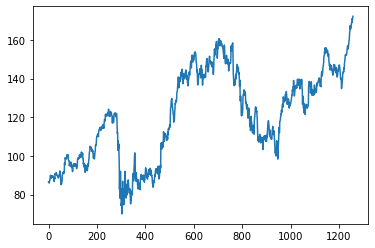

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.1616959 ],
       [0.16026475],
       [0.16018056],
       ...,
       [0.98060333],
       [0.99158844],
       [1.        ]])

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data


array([[0.1616959 ],
       [0.16026475],
       [0.16018056],
       [0.15613968],
       [0.16481074],
       [0.17104044],
       [0.17794361],
       [0.18147939],
       [0.19553829],
       [0.18164776],
       [0.17945894],
       [0.17996406],
       [0.18543608],
       [0.18956115],
       [0.19200252],
       [0.19402296],
       [0.18636212],
       [0.18956115],
       [0.192676  ],
       [0.18880349],
       [0.18838256],
       [0.17693339],
       [0.16834652],
       [0.16430563],
       [0.17878546],
       [0.18291053],
       [0.17727013],
       [0.20362006],
       [0.20050521],
       [0.20479865],
       [0.20294658],
       [0.19898988],
       [0.20825024],
       [0.20143125],
       [0.20033684],
       [0.19360204],
       [0.19419133],
       [0.19217089],
       [0.19149741],
       [0.18821419],
       [0.18190031],
       [0.18223705],
       [0.19351785],
       [0.19090811],
       [0.19385459],
       [0.20185217],
       [0.21203857],
       [0.217

In [17]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 476ms/step - loss: 0.0859 - val_loss: 0.0159
Epoch 2/100
12/12 [==============================] - 4s 381ms/step - loss: 0.0177 - val_loss: 0.0077
Epoch 3/100
12/12 [==============================] - 4s 370ms/step - loss: 0.0093 - val_loss: 0.0116
Epoch 4/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 6/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 8/100
12/12 [==============================] - 4s 360ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 4s 356ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 5s 394ms/step - loss: 0.0039 - val_l

12/12 [==============================] - 6s 531ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 82/100
12/12 [==============================] - 7s 613ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 7s 600ms/step - loss: 0.0011 - val_loss: 9.0556e-04
Epoch 84/100
12/12 [==============================] - 6s 529ms/step - loss: 9.3839e-04 - val_loss: 0.0016
Epoch 85/100
12/12 [==============================] - 6s 510ms/step - loss: 0.0010 - val_loss: 9.3258e-04
Epoch 86/100
12/12 [==============================] - 8s 655ms/step - loss: 9.4230e-04 - val_loss: 9.4055e-04
Epoch 87/100
12/12 [==============================] - 7s 605ms/step - loss: 9.0209e-04 - val_loss: 9.8534e-04
Epoch 88/100
12/12 [==============================] - 6s 524ms/step - loss: 9.2576e-04 - val_loss: 8.3041e-04
Epoch 89/100
12/12 [==============================] - 6s 549ms/step - loss: 9.2094e-04 - val_loss: 8.5631e-04
Epoch 90/100
12/12 [==============================]

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.11.0'

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 2s 105ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

119.36510325595796

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

134.02313028746002

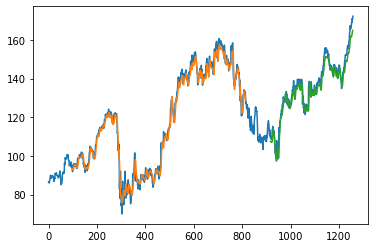

In [32]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8086433424771443,
 0.7706206575670452,
 0.7644443838753997,
 0.7493897167540914,
 0.7526708621523502,
 0.7575925802502276,
 0.727676254559069,
 0.7372301779251919,
 0.7358791180552055,
 0.734142041079369,
 0.7390637591772463,
 0.7506442723478596,
 0.7448540157620639,
 0.727193733177001,
 0.7319224427214642,
 0.7162887499418699,
 0.7139726473077471,
 0.7020061170312836,
 0.7030676640716379,
 0.7091474334860876,
 0.7272902374532187,
 0.7279657673887011,
 0.755372981892323,
 0.7511267937299276,
 0.7541184262985546,
 0.7522848450465002,
 0.7462050756320503,
 0.7350105795672871,
 0.7214034765921834,
 0.7283517844945514,
 0.713683134478115,
 0.7218859979742515,
 0.7393532720059003,
 0.7145516729660332,
 0.7024886384133519,
 0.6922591851127248,
 0.6984354588033924,
 0.7042257153891883,
 0.7256126568166842,
 0.7224046156021197,
 0.7309593921733134,
 0.7358200606791622,
 0.7325148060956154,
 0.7538045341521725,
 0.7523463336008093,
 0.7492355057562051,
 0.7334869397961986,
 0.727459710848867

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.77062066 0.76444438 0.74938972 0.75267086 0.75759258 0.72767625
 0.73723018 0.73587912 0.73414204 0.73906376 0.75064427 0.74485402
 0.72719373 0.73192244 0.71628875 0.71397265 0.70200612 0.70306766
 0.70914743 0.72729024 0.72796577 0.75537298 0.75112679 0.75411843
 0.75228485 0.74620508 0.73501058 0.72140348 0.72835178 0.71368313
 0.721886   0.73935327 0.71455167 0.70248864 0.69225919 0.69843546
 0.70422572 0.72561266 0.72240462 0.73095939 0.73582006 0.73251481
 0.75380453 0.75234633 0.74923551 0.73348694 0.72745971 0.70471178
 0.68575518 0.6874078  0.67992237 0.68342205 0.63413488 0.65095279
 0.66689578 0.66572922 0.68983814 0.70519785 0.71569689 0.7150164
 0.72191855 0.71773837 0.73854204 0.73222317 0.75808192 0.77071966
 0.78734315 0.80066138 0.80523041 0.80211958 0.80561926 0.80766074
 0.80425827 0.80766074 0.81524338 0.83235294 0.83974115 0.85092069
 0.85072626 0.83458884 0.83925509 0.856073   0.86171137 0.87551567
 0.8807652  0.90924871 0.92130317 0.93102451 0.9526

7 day output [[0.81018335]]
8 day input [0.73414204 0.73906376 0.75064427 0.74485402 0.72719373 0.73192244
 0.71628875 0.71397265 0.70200612 0.70306766 0.70914743 0.72729024
 0.72796577 0.75537298 0.75112679 0.75411843 0.75228485 0.74620508
 0.73501058 0.72140348 0.72835178 0.71368313 0.721886   0.73935327
 0.71455167 0.70248864 0.69225919 0.69843546 0.70422572 0.72561266
 0.72240462 0.73095939 0.73582006 0.73251481 0.75380453 0.75234633
 0.74923551 0.73348694 0.72745971 0.70471178 0.68575518 0.6874078
 0.67992237 0.68342205 0.63413488 0.65095279 0.66689578 0.66572922
 0.68983814 0.70519785 0.71569689 0.7150164  0.72191855 0.71773837
 0.73854204 0.73222317 0.75808192 0.77071966 0.78734315 0.80066138
 0.80523041 0.80211958 0.80561926 0.80766074 0.80425827 0.80766074
 0.81524338 0.83235294 0.83974115 0.85092069 0.85072626 0.83458884
 0.83925509 0.856073   0.86171137 0.87551567 0.8807652  0.90924871
 0.92130317 0.93102451 0.95260588 0.93413534 0.94337061 0.94239847
 0.9520226  0.96184115 

15 day output [[0.808084]]
16 day input [0.70200612 0.70306766 0.70914743 0.72729024 0.72796577 0.75537298
 0.75112679 0.75411843 0.75228485 0.74620508 0.73501058 0.72140348
 0.72835178 0.71368313 0.721886   0.73935327 0.71455167 0.70248864
 0.69225919 0.69843546 0.70422572 0.72561266 0.72240462 0.73095939
 0.73582006 0.73251481 0.75380453 0.75234633 0.74923551 0.73348694
 0.72745971 0.70471178 0.68575518 0.6874078  0.67992237 0.68342205
 0.63413488 0.65095279 0.66689578 0.66572922 0.68983814 0.70519785
 0.71569689 0.7150164  0.72191855 0.71773837 0.73854204 0.73222317
 0.75808192 0.77071966 0.78734315 0.80066138 0.80523041 0.80211958
 0.80561926 0.80766074 0.80425827 0.80766074 0.81524338 0.83235294
 0.83974115 0.85092069 0.85072626 0.83458884 0.83925509 0.856073
 0.86171137 0.87551567 0.8807652  0.90924871 0.92130317 0.93102451
 0.95260588 0.93413534 0.94337061 0.94239847 0.9520226  0.96184115
 0.97059035 0.96864608 0.98789433 0.98060333 0.99158844 1.
 0.93888724 0.92569703 0.9034105

23 day output [[0.77670556]]
24 day input [0.75228485 0.74620508 0.73501058 0.72140348 0.72835178 0.71368313
 0.721886   0.73935327 0.71455167 0.70248864 0.69225919 0.69843546
 0.70422572 0.72561266 0.72240462 0.73095939 0.73582006 0.73251481
 0.75380453 0.75234633 0.74923551 0.73348694 0.72745971 0.70471178
 0.68575518 0.6874078  0.67992237 0.68342205 0.63413488 0.65095279
 0.66689578 0.66572922 0.68983814 0.70519785 0.71569689 0.7150164
 0.72191855 0.71773837 0.73854204 0.73222317 0.75808192 0.77071966
 0.78734315 0.80066138 0.80523041 0.80211958 0.80561926 0.80766074
 0.80425827 0.80766074 0.81524338 0.83235294 0.83974115 0.85092069
 0.85072626 0.83458884 0.83925509 0.856073   0.86171137 0.87551567
 0.8807652  0.90924871 0.92130317 0.93102451 0.95260588 0.93413534
 0.94337061 0.94239847 0.9520226  0.96184115 0.97059035 0.96864608
 0.98789433 0.98060333 0.99158844 1.         0.93888724 0.92569703
 0.90341055 0.87929571 0.85682213 0.83747059 0.82185984 0.81018335
 0.80233783 0.7979751

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

1258

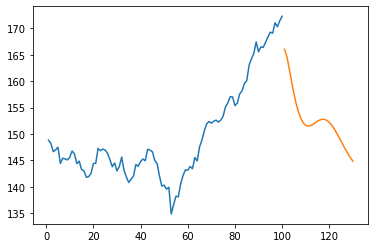

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [40]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.77062066 0.76444438 0.74938972 0.75267086 0.75759258 0.72767625
 0.73723018 0.73587912 0.73414204 0.73906376 0.75064427 0.74485402
 0.72719373 0.73192244 0.71628875 0.71397265 0.70200612 0.70306766
 0.70914743 0.72729024 0.72796577 0.75537298 0.75112679 0.75411843
 0.75228485 0.74620508 0.73501058 0.72140348 0.72835178 0.71368313
 0.721886   0.73935327 0.71455167 0.70248864 0.69225919 0.69843546
 0.70422572 0.72561266 0.72240462 0.73095939 0.73582006 0.73251481
 0.75380453 0.75234633 0.74923551 0.73348694 0.72745971 0.70471178
 0.68575518 0.6874078  0.67992237 0.68342205 0.63413488 0.65095279
 0.66689578 0.66572922 0.68983814 0.70519785 0.71569689 0.7150164
 0.72191855 0.71773837 0.73854204 0.73222317 0.75808192 0.77071966
 0.78734315 0.80066138 0.80523041 0.80211958 0.80561926 0.80766074
 0.80425827 0.80766074 0.81524338 0.83235294 0.83974115 0.85092069
 0.85072626 0.83458884 0.83925509 0.856073   0.86171137 0.87551567
 0.8807652  0.90924871 0.92130317 0.93102451 0.95260588 0.93413

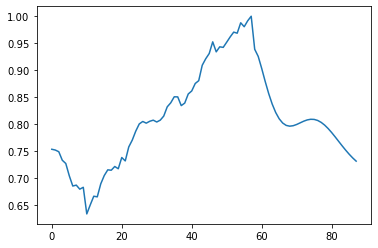

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

In [43]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [44]:
df=pd.read_csv("data.csv")

In [45]:
df.to_json(orient='values')

'[[0,147.098921489],[1,146.9498347443],[2,146.6317830221],[3,145.0216461788],[4,144.4054209672],[5,142.079667749],[6,140.1415400673],[7,140.3105050446],[8,139.5451930883],[9,139.9030012757],[10,134.863869303],[11,136.5833364258],[12,138.2133515018],[13,138.094082106],[14,140.5589829526],[15,142.1293633306],[16,143.2027878928],[17,143.1332140786],[18,143.8388913371],[19,143.4115093355],[20,145.5384802273],[21,144.8924376667],[22,147.536242607],[23,148.8283277282],[24,150.5279166183],[25,151.8895755538],[26,152.3567140206],[27,152.0386622985],[28,152.3964704859],[29,152.6051919286],[30,152.2573228575],[31,152.6051919286],[32,153.3804430013],[33,155.129727473],[34,155.8851003131],[35,157.0280986896],[36,157.0082204569],[37,155.3583271483],[38,155.8354047315],[39,157.5548718543],[40,158.1313406007],[41,159.5426951177],[42,160.0794073988],[43,162.9915684796],[44,164.2240189029],[45,165.2179305346],[46,167.424414357],[47,165.5359822568],[48,166.4801983069],[49,166.3808071437],[50,167.3647796

In [46]:
df3=scaler.inverse_transform(df3).tolist()

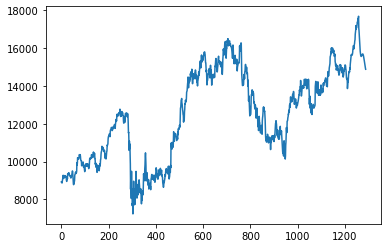

In [47]:
plt.plot(df3)